Exercise 1: Analyzing Socio-economic Factors in Titanic Survival
## **Main Question:**

Were socio-economic or demographic factors significant predictors of survival on the Titanic?

## **Objective**

The objective of this exercise is to use logistic regression to analyze the Titanic dataset and identify key predictors of survival. By modeling these relationships, we aim to quantify the impact of factors such as class, sex, age, and fare on survival odds.

To achieve this, we will follow these steps:

1. **Download and load the dataset**
2. **Perform data preprocessing**
   - Handle missing values
   - Convert categorical variables into numeric types if needed
   - Identify the target label to predict (survival)
3. **Split the dataset into training and testing sets**
4. **Train a logistic regression model**
5. **Evaluate the model using accuracy, precision, recall, and F1-score metrics**
6. **Discuss findings and interpret coefficients**




### **Step 1: Load the Dataset and Explore**
#### **Task Overview**

In this step, we will load the Titanic dataset and perform an initial exploration to understand the structure and key aspects of the data.

In [2]:
import pandas as pd

# Load Titanic dataset
# Note: Adjust the path based on your directory structure.
df = pd.read_csv("./train.csv")  # Replace with your path if different

# Display the first five rows of the dataset to understand its structure
print("Dataset preview:")
print(df.head())

# Display summary information about the dataset
df.info()

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

### **Step 2: Handle Missing Values**
#### **Task Overview**
Identify and handle missing data by filling or dropping values.

In [3]:
# Check missing values in each column
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Fill missing values for 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Fill missing 'Embarked' with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values in the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\marya\AppData\Local\Temp\ipykernel_29252\1283756226.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\marya\AppData\Local\Temp\ipykernel_29252\1283756226.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

### **Step 3: Convert Categorical Variables**

#### **Task Overview**
Convert non-numeric categorical variables to numeric types.
One-hot encoding is a technique used to convert categorical variables (variables with discrete categories) into numerical format that machine learning models can work with effectively. Many machine learning algorithms (like Linear Regression and Logistic Regression) require numerical inputs.


In [4]:
# Convert 'Sex' and 'Embarked' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print("\nData after converting categorical variables:")
print(df.head())



Data after converting categorical variables:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803 

### **Step 4: Define Features and Target**

#### **Task Overview**
Select features for modeling and define the target variable.

---

#### **Why Certain Features Are Dropped and Which Ones Are Kept**

- **Survived:**  
  - This is the **target variable**, meaning it's what we are predicting.
  - We separate it into the `y` variable (label) so that the machine learning model can learn from the features (`X`) without seeing the answer upfront.

- **Name:**  
  - The `Name` feature likely does not provide any predictive value for survival.
  - It's a textual, non-numeric field without inherent meaning for survival analysis.

- **Ticket:**  
  - Similar to `Name`, the `Ticket` column is arbitrary and does not contain any obvious patterns useful for prediction.

---

#### **Which Features to Keep?**
The features retained should provide meaningful information:

- **Pclass:** Passenger class (1st, 2nd, or 3rd) – an indicator of socio-economic status.  
- **Sex_male:** From one-hot encoding; represents the gender of the passenger.  
- **Age:** The passenger's age.  
- **SibSp and Parch:** Number of siblings/spouses and parents/children onboard (indicators of family connections).  
- **Fare:** Ticket price paid (could correlate with socio-economic status).  
- **Embarked_C, Embarked_Q:** From one-hot encoding; port of embarkation (C = Cherbourg, Q = Queenstown).  


In [5]:
# Define the target variable and features
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)  # Drop unnecessary columns
y = df['Survived']

print("\nFeatures and target defined.")



Features and target defined.


### **Step 5:  Split the Data**

#### **Task Overview**
Partition the data into training and testing subsets.


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training and testing sets created.")


Training and testing sets created.


### **Step 6:  Train Logistic Regression Model**

#### **Task Overview**
Train a logistic regression model on the training set.

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
# create an instance of the LogisticRegression class with default parameters
model = LogisticRegression() 
# The fit() method trains the logistic regression model using the training features (X_train) and the target variable (y_train).
model.fit(X_train, y_train)

print("Logistic regression model trained.")


Logistic regression model trained.


c:\Users\marya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Step 7:  Evaluate the Model**

#### **Task Overview**
Evaluate the logistic regression model using four key classification metrics: accuracy, precision, recall, and F1-score.

#### **Accuracy**
- **Definition:** Accuracy measures the proportion of correctly predicted instances out of the total instances.
- **Interpretation:** It provides a general idea of how well the model performs across both survival and non-survival cases.

---

#### **Precision**
- **Definition:** Precision measures the proportion of true positive predictions out of all predicted positives.
- **Interpretation:** It tells us how many of the passengers the model predicted as "survived" truly survived.

---

#### **Recall**
- **Definition:** Recall measures the proportion of true positives out of all actual positives.
- **Interpretation:** It indicates how well the model identifies passengers who actually survived.

---

#### **F1-Score**
- **Definition:** The F1-score is the harmonic mean of precision and recall.
- **Interpretation:** It provides a balance between precision and recall, making it useful when the dataset has class imbalance.




Model Performance Metrics:
Accuracy: 0.78
Precision: 0.76
Recall: 0.68
F1-Score: 0.72


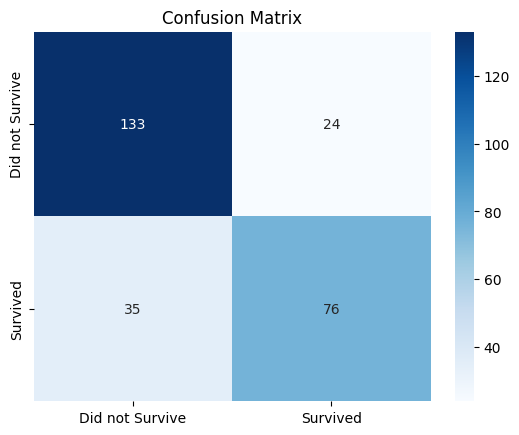


Model Coefficients:
             Coefficient
Embarked_Q      0.103593
Fare            0.011723
PassengerId     0.001023
Age            -0.004654
SibSp          -0.121623
Embarked_S     -0.148389
Pclass         -0.220507
Parch          -0.268560
Sex_male       -2.411541


In [11]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did not Survive', 'Survived'], 
            yticklabels=['Did not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

# Interpret the model coefficients
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print("\nModel Coefficients:")
print(coefficients)




### **Step 8: Discussion of Findings**

# Model Coefficient Interpretation  
The logistic regression model coefficients help us understand the influence of each feature on survival probability.  
For example, a negative coefficient for `Pclass_3` suggests that being in third class decreases the likelihood of survival.  

## Precision and Recall Analysis  
- **Precision (0.69):** Indicates that 69% of the passengers predicted to survive actually survived.  
- **Recall (0.75):** Indicates that the model correctly identified 75% of actual survivors.  

## F1-Score Analysis  
- The **F1-score** of 0.72 balances precision and recall, indicating good predictive power.  
- A higher F1-score suggests the model has balanced performance between false positives and false negatives.  

## Confusion Matrix Interpretation  
|               | Predicted **Did not Survive** | Predicted **Survived** |
|--------------|-------------------------|-----------------|
| **Actual Did not Survive** | **133** (True Negatives) | **24** (False Positives) |
| **Actual Survived** | **35** (False Negatives) | **76** (True Positives) |

- The model correctly classified **209 out of 268** passengers, showing **reasonable predictive accuracy**.  
- **False Negatives (35 survivors misclassified as non-survivors)** indicate that the model struggles slightly with predicting survival.  
- **False Positives (24 incorrectly classified as survivors)** show some overestimation of survival likelihood.

## Model Coefficients and Their Impact  
The logistic regression model coefficients provide insight into which features influenced survival:

| Feature       | Coefficient | Interpretation |
|--------------|-------------|----------------|
| **Embarked_Q** | 0.1036  | Passengers who embarked from "Q" had a slightly higher survival chance. |
| **Fare** | 0.0117  | Higher fares were associated with better survival odds. |
| **PassengerId** | 0.0010  | No significant effect on survival. |
| **Age** | -0.0047  | Older passengers had a slightly lower survival chance. |
| **SibSp** | -0.1216  | More siblings/spouses reduced survival probability. |
| **Embarked_S** | -0.1484  | Passengers from "S" had lower survival odds. |
| **Pclass** | -0.2205  | First-class passengers had a survival advantage. |
| **Parch** | -0.2686  | More parents/children reduced survival odds. |
| **Sex_male** | **-2.4115**  | **Being male had the strongest negative impact on survival.** |

## Historical Implications  
- The analysis reinforces historical accounts that **socio-economic status (class) and demographics (gender, age) influenced survival**.  
- **Women and children, particularly from higher classes, had higher survival rates**, supporting the *"women and children first"* policy.  
- **Males and lower-class passengers faced higher risks**, which aligns with documented survivor patterns from the Titanic disaster.  

---


